In [9]:
import matplotlib.pyplot as plt
import xarray as xr

from ocr import catalog
from ocr.config import OCRConfig

In [10]:
config = OCRConfig(storage_root='/tmp/ocr-testing', debug=True)

In [11]:
region_id = 'y6_x7'
y_slice, x_slice = config.chunking.region_id_to_latlon_slices(region_id=region_id)
y_slice, x_slice

(slice(np.float64(33.515893851345204), np.float64(35.363857121965516), None),
 slice(np.float64(-118.68574904867506), np.float64(-117.29977659570983), None))

In [21]:
# %%time
# ds = calculate_wind_adjusted_risk(x_slice=x_slice, y_slice=y_slice)
# ds.to_zarr('s3://carbonplan-scratch/ocr/after.zarr', mode='w')
# ds

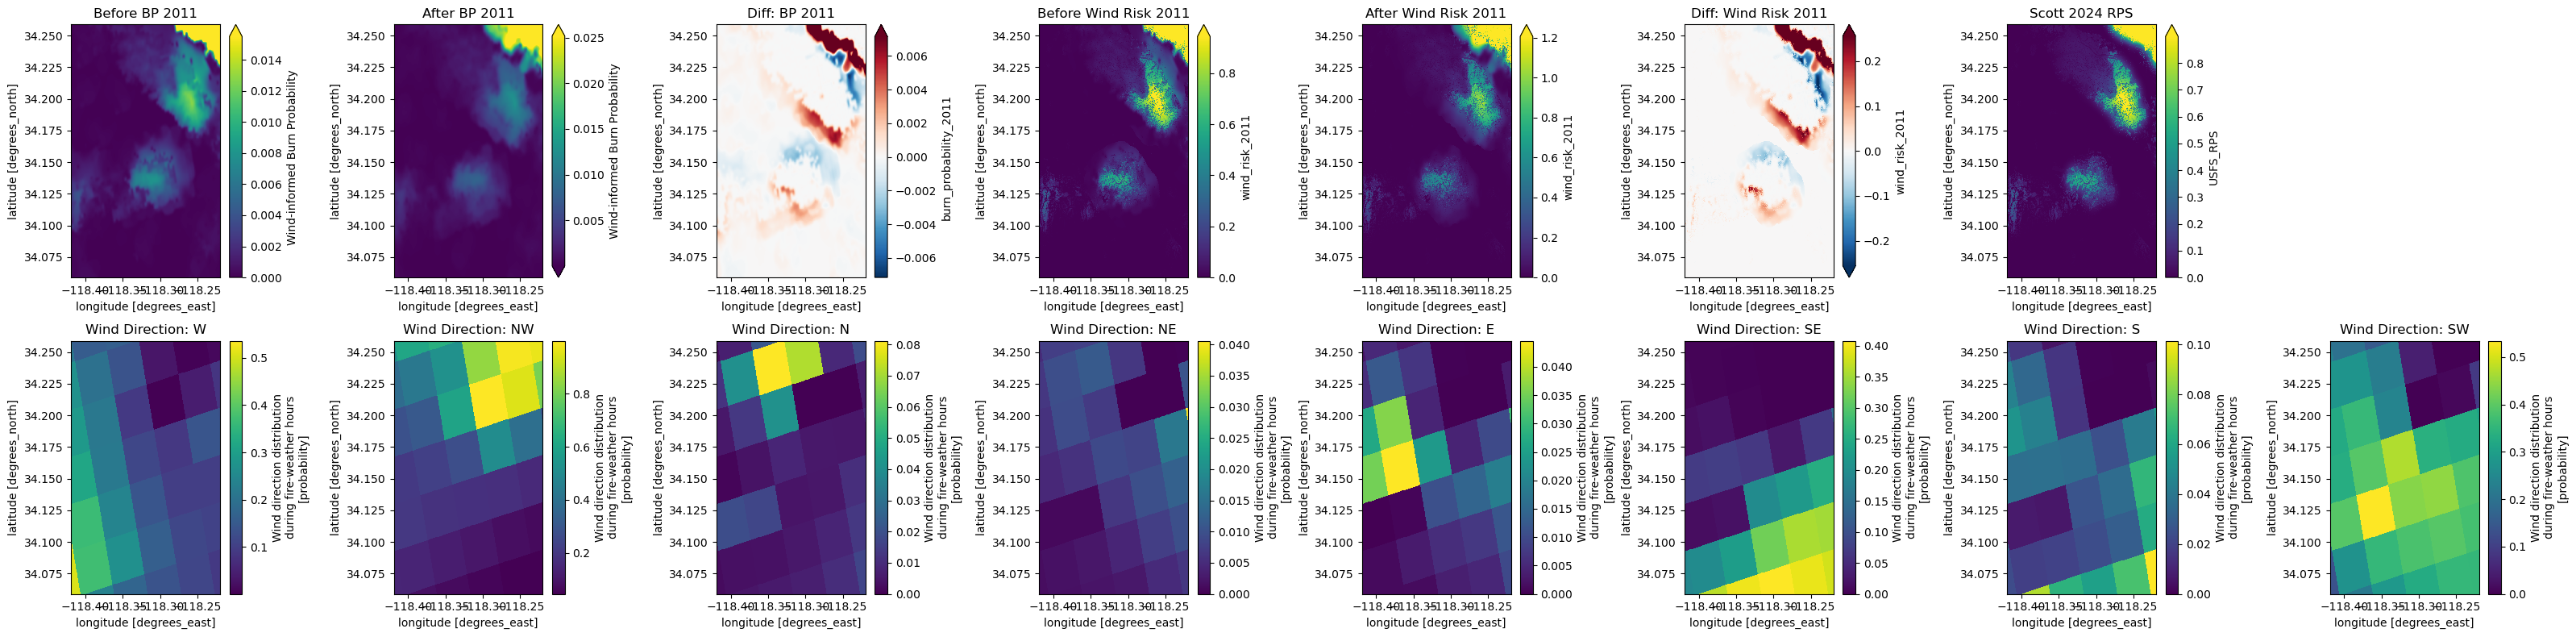

In [23]:
ds_after = xr.open_zarr('s3://carbonplan-scratch/ocr/after.zarr')
ds_before = xr.open_zarr('s3://carbonplan-scratch/ocr/before.zarr')
diff = ds_after - ds_before
# # griffith
lat = 34.15883207704988
lon = -118.3194545446337

# altadena
# lat = 34.197179348047236
# lon = -118.14920706081259

# Load wind direction distribution for this region
wind_dist = (
    catalog.get_dataset('conus404-ffwi-p99-wind-direction-distribution-30m-4326')
    .to_xarray()
    .wind_direction_distribution
)

fig, axarr = plt.subplots(nrows=2, ncols=8, figsize=(32, 8))

# Row 1: Before and After absolute values
ds_before.sel(
    latitude=slice(lat - 0.1, lat + 0.1), longitude=slice(lon - 0.1, lon + 0.1)
).burn_probability_2011.plot(robust=True, ax=axarr[0, 0])
axarr[0, 0].set_title('Before BP 2011')

ds_after.sel(
    latitude=slice(lat - 0.1, lat + 0.1), longitude=slice(lon - 0.1, lon + 0.1)
).burn_probability_2011.plot(robust=True, ax=axarr[0, 1])
axarr[0, 1].set_title('After BP 2011')

diff.sel(
    latitude=slice(lat - 0.1, lat + 0.1), longitude=slice(lon - 0.1, lon + 0.1)
).burn_probability_2011.plot(robust=True, ax=axarr[0, 2])
axarr[0, 2].set_title('Diff: BP 2011')

ds_before.sel(
    latitude=slice(lat - 0.1, lat + 0.1), longitude=slice(lon - 0.1, lon + 0.1)
).wind_risk_2011.plot(robust=True, ax=axarr[0, 3])
axarr[0, 3].set_title('Before Wind Risk 2011')

ds_after.sel(
    latitude=slice(lat - 0.1, lat + 0.1), longitude=slice(lon - 0.1, lon + 0.1)
).wind_risk_2011.plot(robust=True, ax=axarr[0, 4])
axarr[0, 4].set_title('After Wind Risk 2011')

diff.sel(
    latitude=slice(lat - 0.1, lat + 0.1), longitude=slice(lon - 0.1, lon + 0.1)
).wind_risk_2011.plot(robust=True, ax=axarr[0, 5])
axarr[0, 5].set_title('Diff: Wind Risk 2011')

ds_after.sel(
    latitude=slice(lat - 0.1, lat + 0.1), longitude=slice(lon - 0.1, lon + 0.1)
).USFS_RPS.plot(robust=True, ax=axarr[0, 6])
axarr[0, 6].set_title('Scott 2024 RPS')

# Empty column
axarr[0, 7].axis('off')

# Row 2: Wind direction distribution for all 8 directions
directions = ['W', 'NW', 'N', 'NE', 'E', 'SE', 'S', 'SW']
for i, direction in enumerate(directions):
    wind_dist.sel(
        latitude=slice(lat - 0.1, lat + 0.1),
        longitude=slice(lon - 0.1, lon + 0.1),
        wind_direction=i,
    ).plot(ax=axarr[1, i], cmap='viridis')
    axarr[1, i].set_title(f'Wind Direction: {direction}')

plt.tight_layout()
plt.show()

In [5]:
# Check available variables
print('ds_after variables:', list(ds_after.data_vars))
print('ds_before variables:', list(ds_before.data_vars))

ds_after variables: ['burn_probability_2011', 'burn_probability_2047', 'burn_probability_usfs_2011', 'burn_probability_usfs_2047', 'conditional_risk_usfs', 'USFS_RPS', 'wind_risk_2011', 'wind_risk_2047']
ds_before variables: ['burn_probability_2011', 'burn_probability_2047', 'burn_probability_usfs_2011', 'burn_probability_usfs_2047', 'conditional_risk_usfs', 'USFS_RPS', 'wind_risk_2011', 'wind_risk_2047']
